In [3]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
working_directory =r"Y:\Data\PB_DATA\Neruopixel_ProcessedData\JPO-001991\Pre_CNo\2019-10-31_12-01-40\experiment1\recording1\continuous\Neuropix-PXI-100.0\Sorting\1"

In [11]:
metrics = pd.read_csv(os.path.join(working_directory,"metrics.csv"),index_col=0)
df=pd.read_csv(os.path.join(working_directory , 'cluster_KSLabel.tsv'),header=0, delim_whitespace=True)

In [12]:
mask = df['cluster_id'].isin(metrics['cluster_id'])
metrics['quality'] = df.loc[mask,'KSLabel']

In [13]:
metrics

,cluster_id,firing_rate,presence_ratio,isi_viol,amplitude_cutoff,isolation_distance,l_ratio,d_prime,nn_hit_rate,nn_miss_rate,...,duration,halfwidth,PT_ratio,repolarization_slope,recovery_slope,amplitude,spread,velocity_above,velocity_below,quality
0,0,4.485631,0.97,4.766087,0.475468,6.239127e+01,3.592327e-03,3.418839,0.850523,0.005489,...,0.439531,0.384590,0.517244,0.018829,-0.010226,7.460310,110.0,-0.103015,0.000000,mua
1,1,0.525673,0.80,0.684494,0.500000,4.034331e+01,1.026210e-02,2.645846,0.672222,0.000268,...,1.483417,0.439531,0.071514,0.012868,-0.010563,6.948825,170.0,0.663875,2.174763,good
2,2,0.732410,0.90,2.115652,0.500000,1.997509e+01,4.476442e-02,2.501778,0.276190,0.000535,...,0.535678,0.164824,2.039785,0.050635,-0.010658,12.443730,30.0,-7.554439,NaN,mua
3,3,2.036415,0.99,5.838192,0.500000,3.414073e+01,4.759195e-02,2.027860,0.465969,0.003262,...,0.988945,0.412060,0.290270,0.017072,-0.009441,8.018595,150.0,1.774149,0.016352,mua
4,4,3.562297,0.83,0.983750,0.500000,NaN,NaN,NaN,NaN,0.000000,...,0.425796,0.494472,0.099354,0.011197,-0.008282,23.748660,80.0,NaN,0.008176,mua
5,5,15.536707,0.99,0.006530,0.025890,1.039151e+02,1.581723e-03,5.961070,0.994667,0.001612,...,0.206030,0.123618,0.444152,0.125518,-0.030761,29.256825,30.0,-0.343384,NaN,good
6,6,11.196751,0.69,0.011567,0.002574,8.234416e+01,1.850939e-04,6.977911,1.000000,0.002354,...,0.178559,0.096147,0.888834,0.133834,-0.057572,34.234590,40.0,0.000000,NaN,good
7,7,0.476218,0.99,3.058169,0.500000,1.873171e+01,6.409442e-02,2.221526,0.144928,0.001203,...,0.494472,0.178559,2.125614,0.060804,-0.011095,18.834465,60.0,0.137353,-0.343384,mua
8,8,17.436363,0.99,0.005599,0.104869,1.076941e+02,1.432485e-03,5.360408,0.990667,0.010595,...,0.370854,0.151089,0.286708,0.075860,-0.002523,22.339785,50.0,0.343384,1.030151,good
9,9,2.121364,0.99,0.070052,0.500000,5.034819e+01,8.287325e-03,4.364370,0.909786,0.001397,...,0.439531,0.260972,0.310959,0.032920,-0.003918,10.176270,70.0,0.000000,-0.206030,good


In [50]:
metrics_select = metrics.loc[:,['cluster_id','isi_viol','amplitude_cutoff',
                                'isolation_distance','l_ratio','quality','firing_rate','d_prime',
       'nn_hit_rate', 'nn_miss_rate', 'silhouette_score', 'max_drift',
       'cumulative_drift']]


In [49]:
metrics.columns

Index(['cluster_id', 'firing_rate', 'presence_ratio', 'isi_viol',
       'amplitude_cutoff', 'isolation_distance', 'l_ratio', 'd_prime',
       'nn_hit_rate', 'nn_miss_rate', 'silhouette_score', 'max_drift',
       'cumulative_drift', 'epoch_name_quality_metrics',
       'epoch_name_waveform_metrics', 'peak_channel', 'snr', 'duration',
       'halfwidth', 'PT_ratio', 'repolarization_slope', 'recovery_slope',
       'amplitude', 'spread', 'velocity_above', 'velocity_below', 'quality'],
      dtype='object')

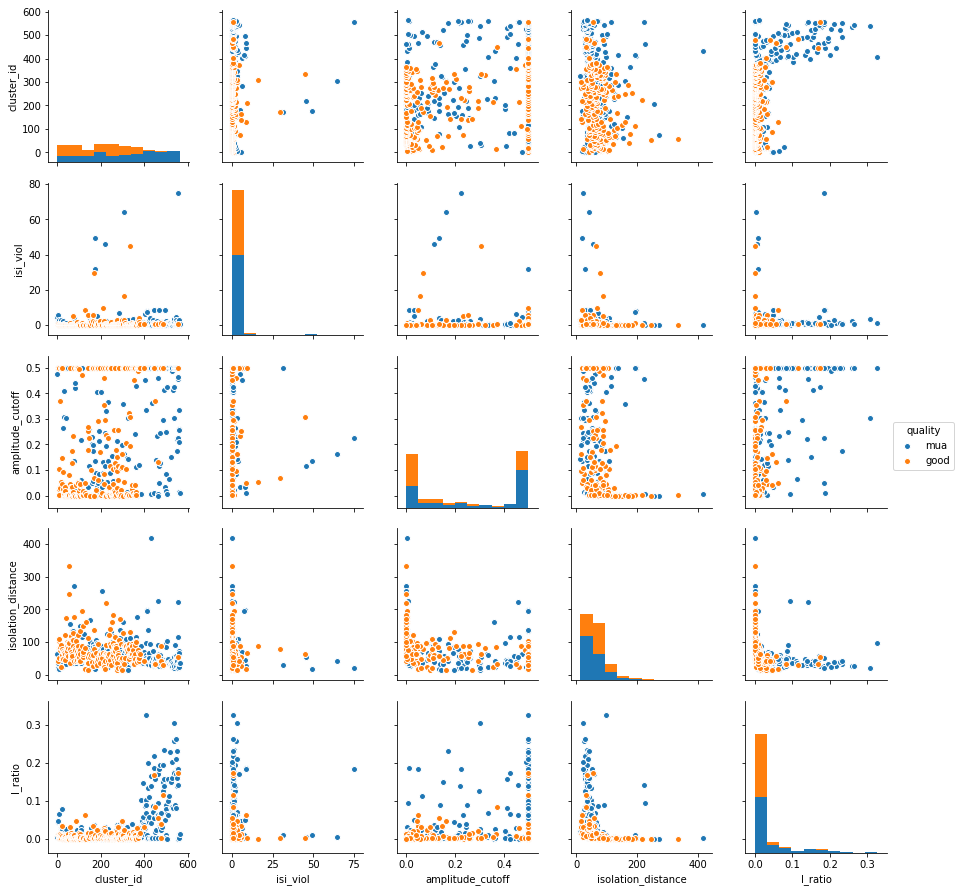

In [15]:
sns.pairplot((metrics_select.dropna()),hue='quality')
plt.show()

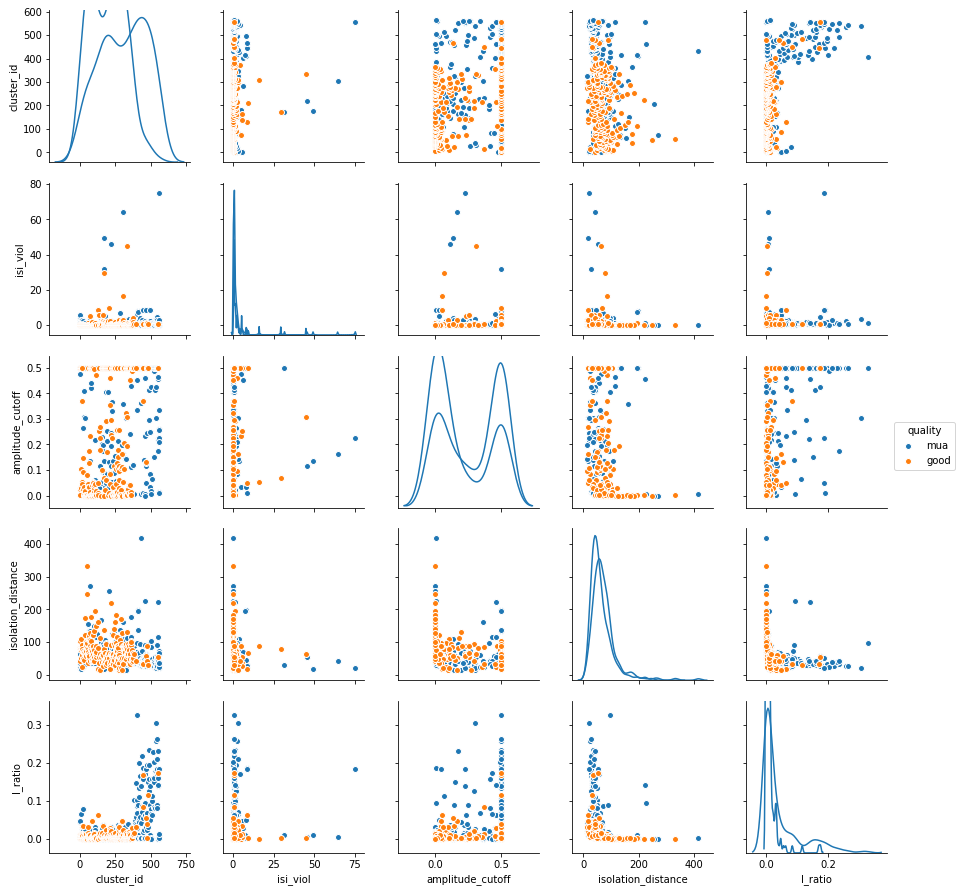

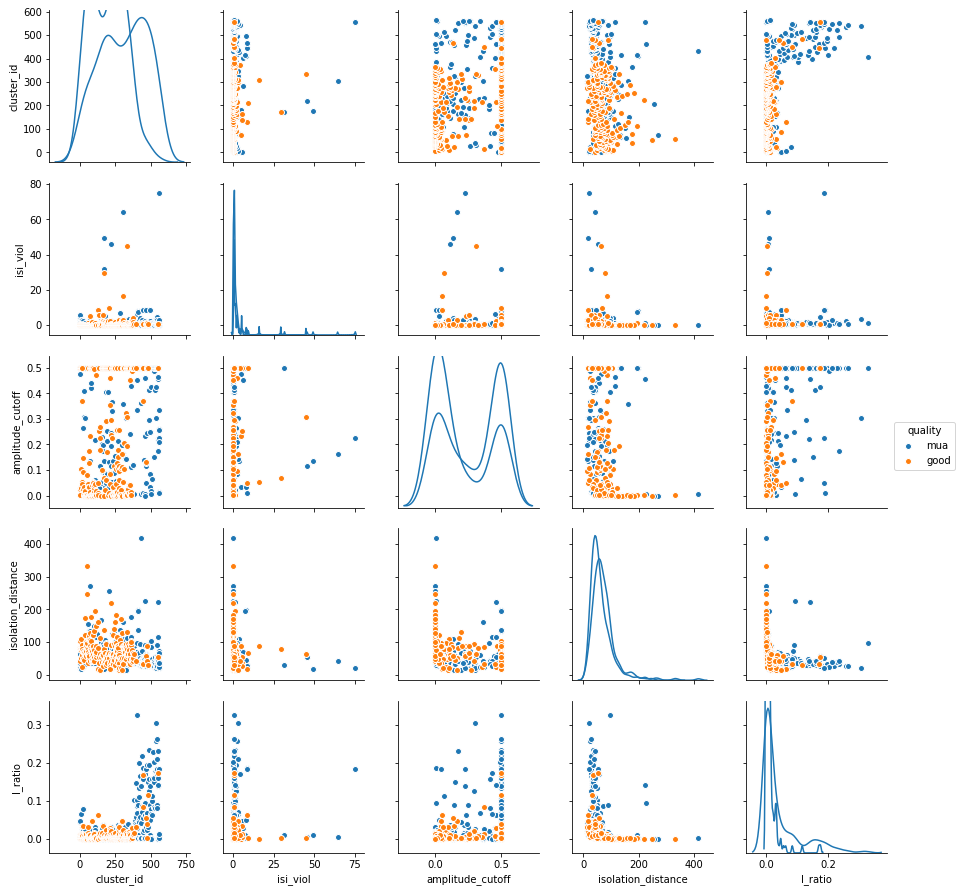

In [61]:
g=sns.pairplot((metrics_select.dropna()),hue='quality',
             diag_kind='kde',markers='o',)
plt.show()

<IPython.core.display.Javascript object>


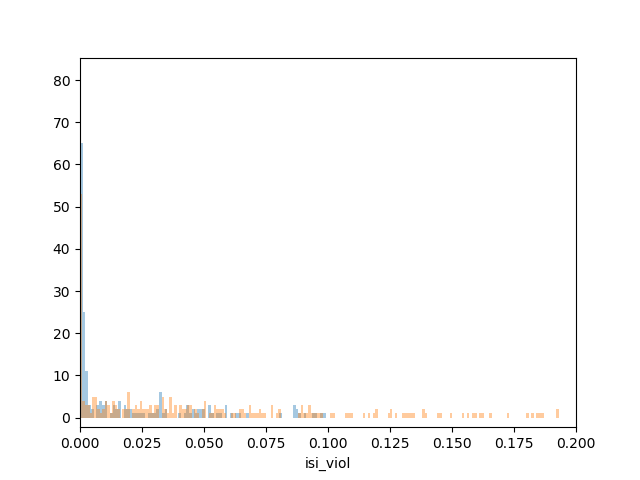

C:\Users\tobiasleva\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


In [19]:
% matplotlib notebook
sns.distplot(metrics_select.amplitude_cutoff,bins = np.arange(0,0.1,0.0011),kde=False)
plt.show()

,cluster_id,isi_viol,amplitude_cutoff,isolation_distance,l_ratio,quality
5,5,0.006530,0.025890,103.915098,1.581723e-03,good
6,6,0.011567,0.002574,82.344160,1.850939e-04,good
10,10,0.015956,0.032931,74.090317,6.578991e-03,good
11,11,0.014803,0.029561,84.047232,1.706337e-04,good
15,15,0.031612,0.052478,89.170438,2.784491e-04,good
20,20,0.038258,0.046821,59.187376,3.349162e-02,good
24,24,0.000000,0.024086,72.364954,8.953205e-06,good
26,26,0.000000,0.094108,49.331763,1.482798e-03,good
29,29,0.005664,0.001693,69.044153,3.884624e-03,good
31,31,0.027625,0.003030,66.839855,1.699431e-03,good


In [38]:


#sns.distplot(metrics_select.isi_viol,bins = np.arange(0,5,0.0051),kde=False)
#plt.xlim(0,0.2)
#plt.show()

,cluster_id,isi_viol,amplitude_cutoff,isolation_distance,l_ratio,quality
5,5,0.006530,0.025890,103.915098,1.581723e-03,good
6,6,0.011567,0.002574,82.344160,1.850939e-04,good
10,10,0.015956,0.032931,74.090317,6.578991e-03,good
11,11,0.014803,0.029561,84.047232,1.706337e-04,good
15,15,0.031612,0.052478,89.170438,2.784491e-04,good
20,20,0.038258,0.046821,59.187376,3.349162e-02,good
24,24,0.000000,0.024086,72.364954,8.953205e-06,good
26,26,0.000000,0.094108,49.331763,1.482798e-03,good
29,29,0.005664,0.001693,69.044153,3.884624e-03,good
31,31,0.027625,0.003030,66.839855,1.699431e-03,good


<IPython.core.display.Javascript object>


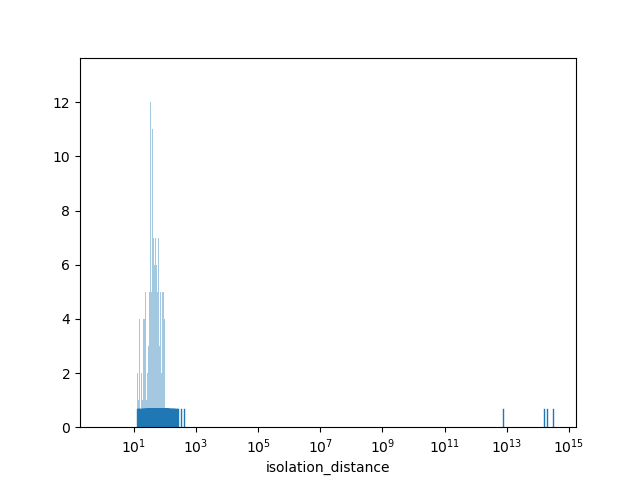

C:\Users\tobiasleva\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


,cluster_id,isi_viol,amplitude_cutoff,isolation_distance,l_ratio,quality
5,5,0.006530,0.025890,103.915098,1.581723e-03,good
6,6,0.011567,0.002574,82.344160,1.850939e-04,good
10,10,0.015956,0.032931,74.090317,6.578991e-03,good
11,11,0.014803,0.029561,84.047232,1.706337e-04,good
15,15,0.031612,0.052478,89.170438,2.784491e-04,good
20,20,0.038258,0.046821,59.187376,3.349162e-02,good
24,24,0.000000,0.024086,72.364954,8.953205e-06,good
29,29,0.005664,0.001693,69.044153,3.884624e-03,good
31,31,0.027625,0.003030,66.839855,1.699431e-03,good
36,36,0.156437,0.018749,61.871187,3.420226e-03,good


In [43]:
fig, ax = plt.subplots()
sns.distplot(metrics_select.isolation_distance.dropna(),kde=False,ax = ax,bins = np.arange(0,100,1), rug = True)
ax.set_xscale('log')
#ax.set_xlim(5,100)
plt.show()



<IPython.core.display.Javascript object>


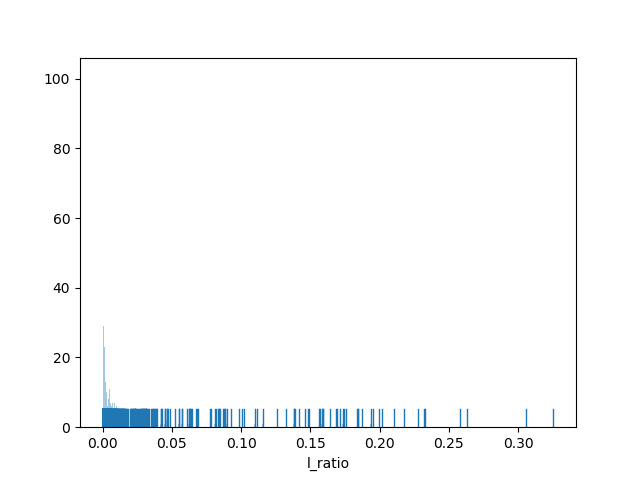

C:\Users\tobiasleva\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


,cluster_id,isi_viol,amplitude_cutoff,isolation_distance,l_ratio,quality
5,5,0.006530,0.025890,103.915098,1.581723e-03,good
6,6,0.011567,0.002574,82.344160,1.850939e-04,good
10,10,0.015956,0.032931,74.090317,6.578991e-03,good
11,11,0.014803,0.029561,84.047232,1.706337e-04,good
15,15,0.031612,0.052478,89.170438,2.784491e-04,good
20,20,0.038258,0.046821,59.187376,3.349162e-02,good
24,24,0.000000,0.024086,72.364954,8.953205e-06,good
29,29,0.005664,0.001693,69.044153,3.884624e-03,good
31,31,0.027625,0.003030,66.839855,1.699431e-03,good
36,36,0.156437,0.018749,61.871187,3.420226e-03,good


In [48]:
fig, ax = plt.subplots()
sns.distplot(metrics_select.l_ratio.dropna(),kde=False,ax = ax,bins = np.arange(0,0.2,0.00051), rug = True)
#ax.set_xscale('log')
#ax.set_xlim(0,0.2)
plt.show()



In [54]:
metrics_select.d_prime

0      3.418839
1      2.645846
2      2.501778
3      2.027860
4           NaN
5      5.961070
6      6.977911
7      2.221526
8      5.360408
9      4.364370
10     4.107459
11     5.361579
12     3.985235
13          NaN
14     4.005302
15     4.650931
16     3.341007
17     3.902687
18     3.096438
19     3.605359
20     3.358488
21     2.510295
22     3.024535
23     2.538175
24     7.919899
25          NaN
26     5.155581
27     5.193744
28     3.975071
29     4.340554
         ...   
521    3.434490
522    0.998093
523    1.975232
524    3.377612
525         NaN
526    5.730628
527         NaN
528         NaN
529    2.735961
530    1.663539
531    3.312338
532         NaN
533    1.641067
534    2.033111
535    1.431724
536    2.603842
537         NaN
538    1.141715
539    3.505209
540    2.764494
541    3.035607
542    7.557001
543    2.410417
544    5.311502
545    4.760271
546    5.245405
547    2.732622
548    3.374588
549    3.501547
550         NaN
Name: d_prime, Length: 5

<IPython.core.display.Javascript object>


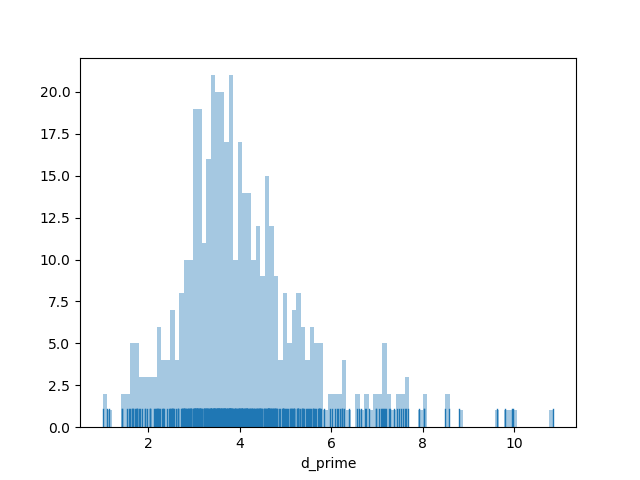

C:\Users\tobiasleva\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


In [55]:
fig, ax = plt.subplots()
sns.distplot(metrics_select.d_prime.dropna(),kde=False,ax = ax,bins = 100, rug = True)
#ax.set_xscale('log')
#ax.set_xlim(0,0.2)
plt.show()

In [56]:
metrics_select.columns

Index(['cluster_id', 'isi_viol', 'amplitude_cutoff', 'isolation_distance',
       'l_ratio', 'quality', 'firing_rate', 'd_prime', 'nn_hit_rate',
       'nn_miss_rate', 'silhouette_score', 'max_drift', 'cumulative_drift'],
      dtype='object')

<IPython.core.display.Javascript object>


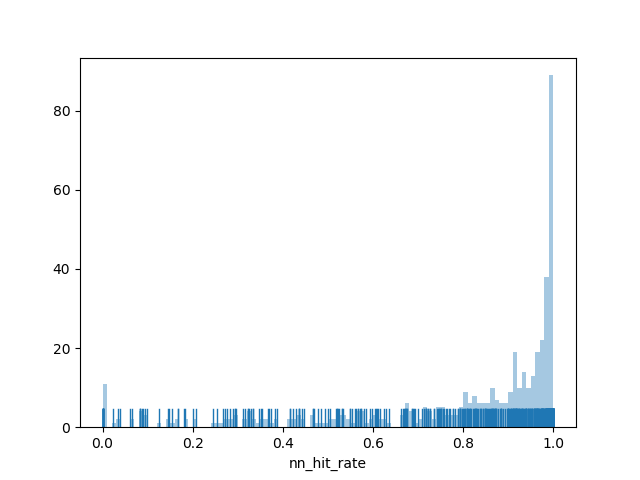

C:\Users\tobiasleva\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


In [62]:
fig, ax = plt.subplots()
sns.distplot(metrics_select.nn_hit_rate.dropna(),kde=False,ax = ax,bins = 100, rug = True)
#ax.set_xscale('log')
#ax.set_xlim(0,0.2)
plt.show()

In [66]:
nn_hit_rate_thr = 0.8
isi_thr = 0.2
amplitude_cutoff_thr = 0.1
isolation_distance_thr = 50
lratio_thr = 0.2


metrics_clean= metrics_select[(metrics_select.isi_viol < isi_thr) & (metrics_select.amplitude_cutoff < amplitude_cutoff_thr)&
               (metrics_select.isolation_distance > isolation_distance_thr)&
               (metrics_select.l_ratio.dropna() < lratio_thr)&
               (metrics_select.nn_hit_rate.dropna() > nn_hit_rate_thr)]

<IPython.core.display.Javascript object>


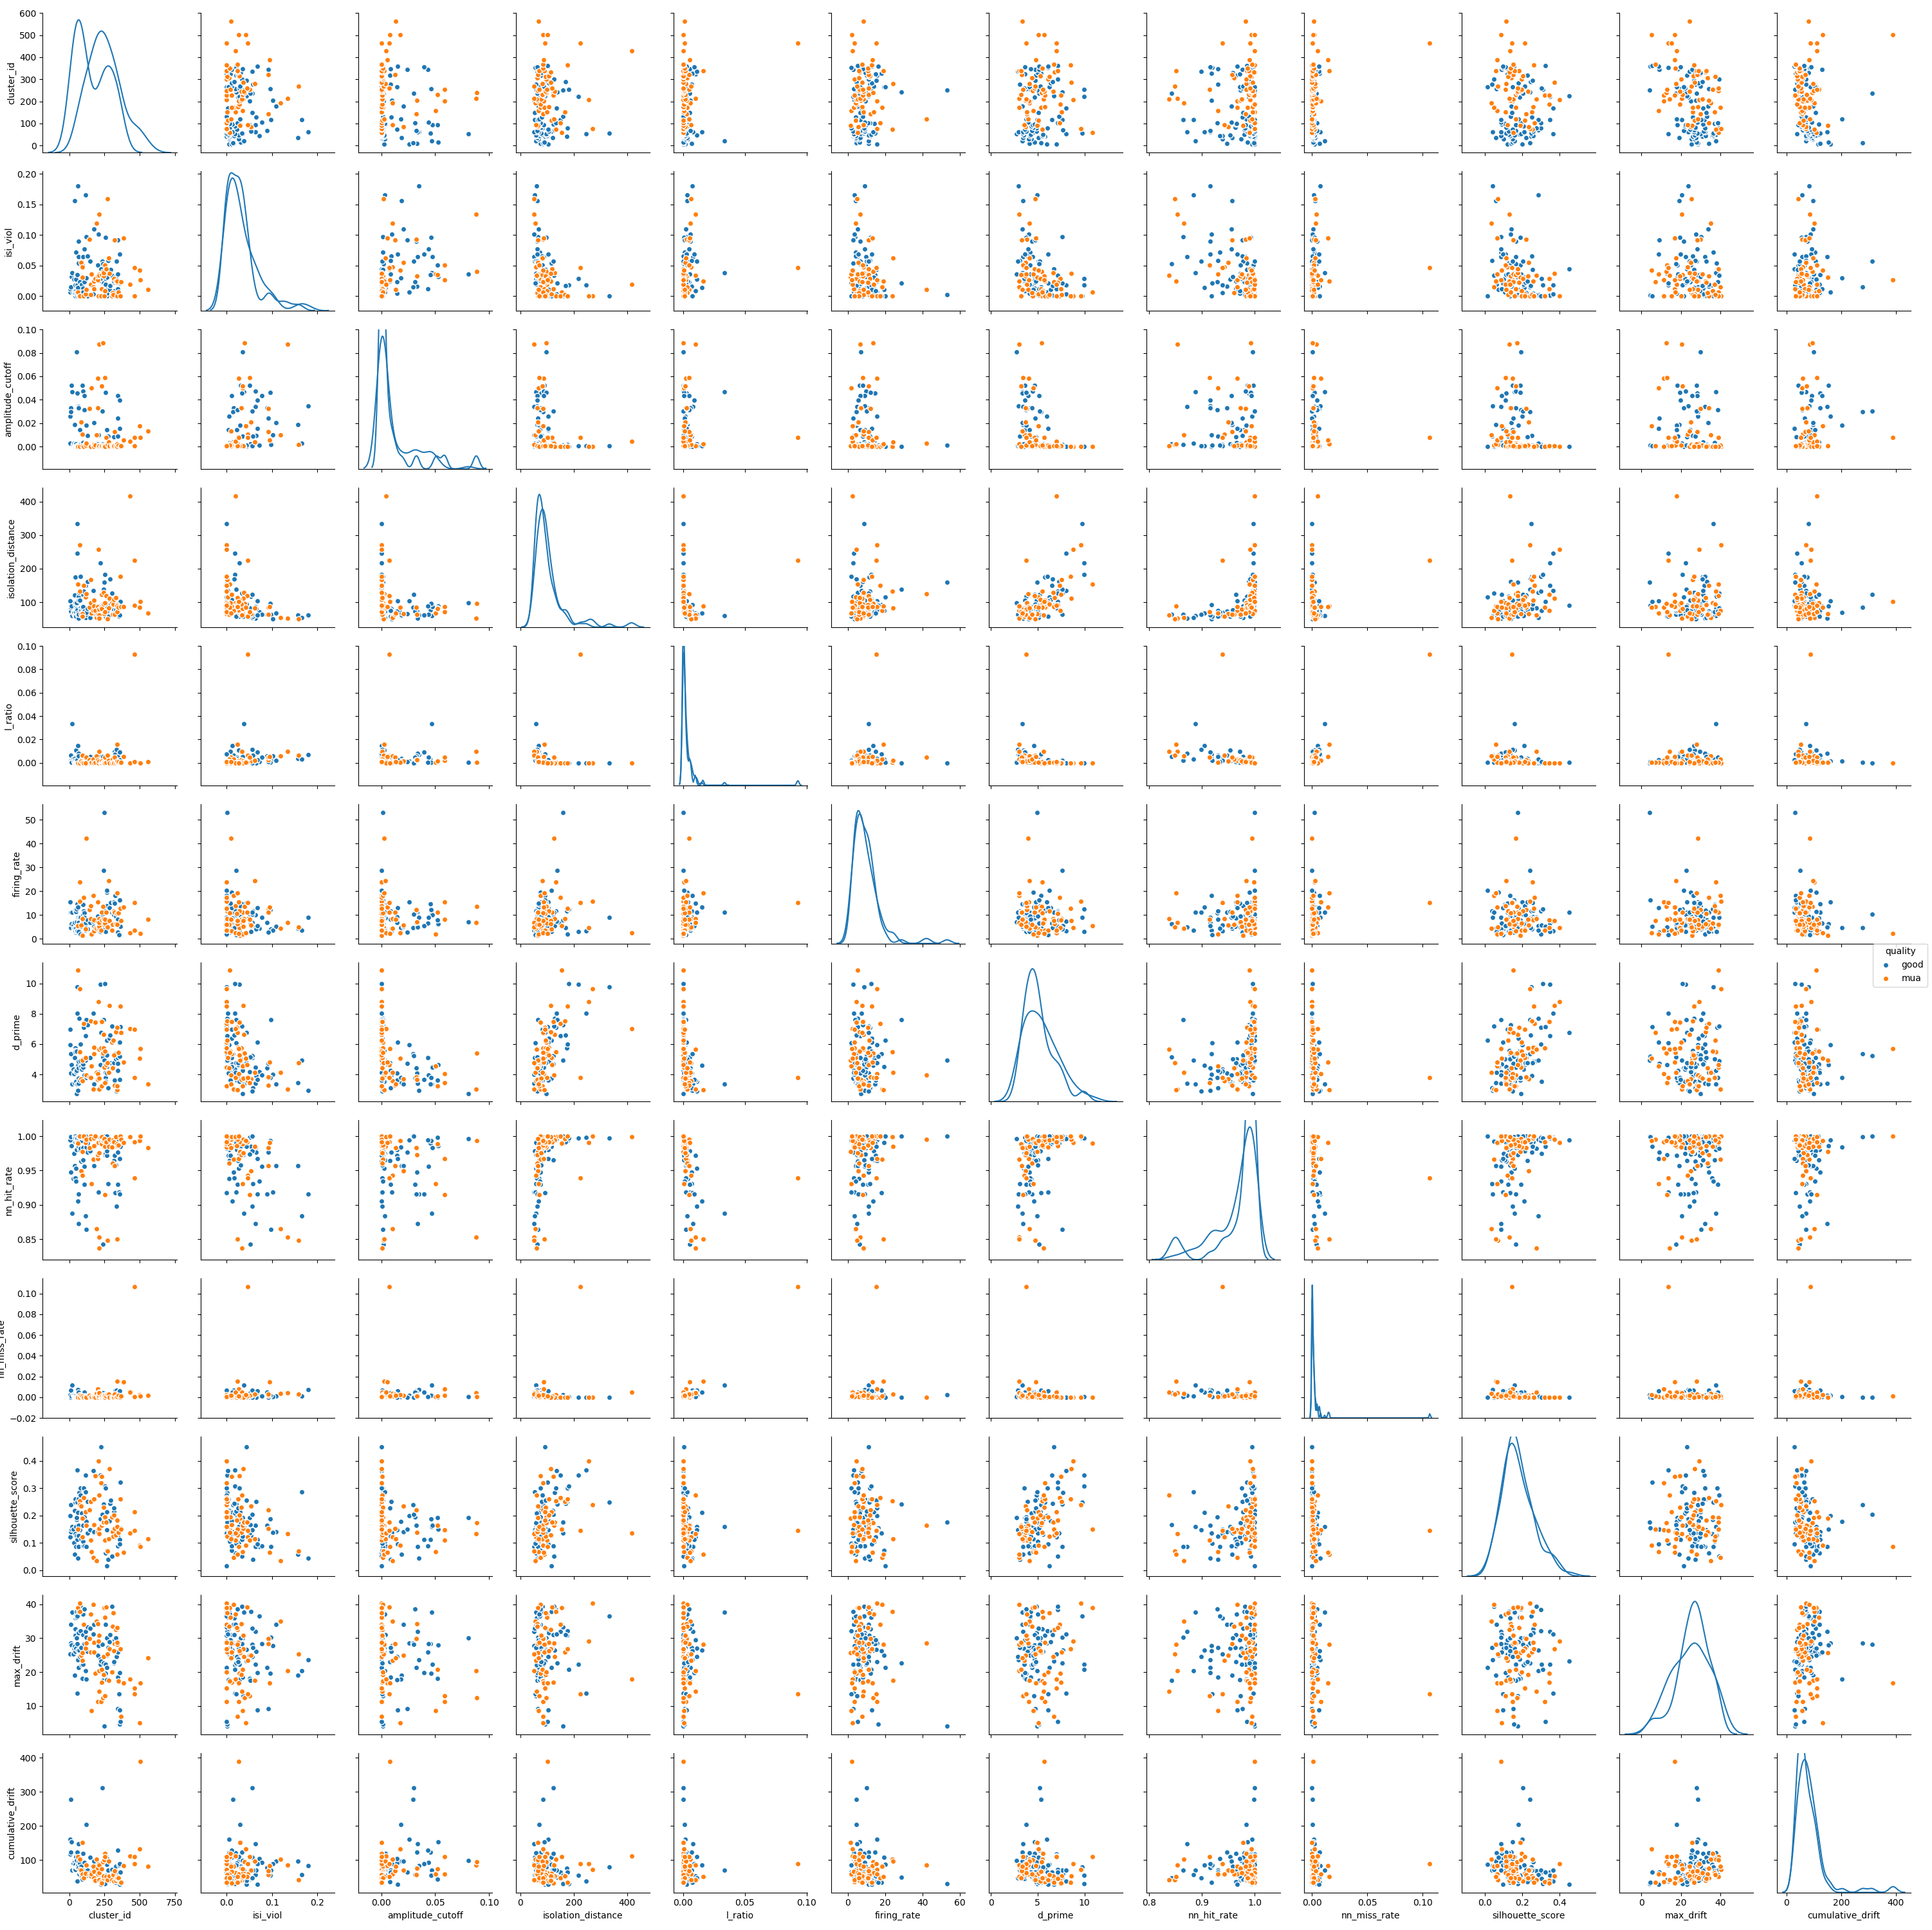

In [69]:
g = sns.pairplot(metrics_clean.dropna(),hue = 'quality',diag_kind='kde')
plt.show()